# CS 109A/AC 209A/STAT 121A Data Science: Lab 2
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>

Import libraries

In [2]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

---

## Problem 2: Handling Missing Data

In this problem, we will be handling the problem of datasets with missing values. Clearly, we cannot simply remove entire rows or columns that contain missing values. In this problem, we explore two different ways to fill in missing values.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

The files ``dataset_1_missing.txt`` to ``dataset_6_missing.txt`` contains rows that are missing their y-values, where as ``dataset_1_full.txt`` to ``dataset_6_full.txt`` contain datasets with all y-values correctly filled in.
 
In this problem, you **may not** use ``sklearn`` or build-in ``pandas`` functions to **directly fill in missing values**. Usage of these libraries/pakcages for related tasks is fine.

### Part (a): Model Based Data Imputation

- Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set.


- Implement your scheme. That is, write code (preferably a function ``fill`` or two functions ``fill_knn``, ``fill_lin_reg``), which takes an ``n x 2`` dataframe or array with values missing in the 2nd column and fills in these values using KNN and linear regression. 


- You need to, also, write code to evaluate the quality of the values you've filled in.

**Solution:**

In [5]:
#--------  fill_knn
#input: missing_df (dataframe), full_df (dataframe), missing_ind (indices of missing values), 
#       filled_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)

def fill_knn(missing_df, full_df, missing_ind, filled_ind, k):
    #preparing data in array form
    x_filled = missing_df.loc[filled_ind, 'x'].values.reshape((len(filled_ind), 1))
    y_filled = missing_df.loc[filled_ind, 'y'].values
    x_missing = missing_df.loc[missing_ind, 'x'].values.reshape((len(missing_ind), 1))
    y_missing = full_df.loc[missing_ind, 'y'].values
    
    #fit knn model
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_filled, y_filled)
    
    #predict y-values
    predicted_y = neighbours.predict(x_missing)
    
    #score predictions
    r = neighbours.score(x_missing, y_missing)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[missing_ind, 'y'] = pd.Series(predicted_y, index=missing_ind)
    
    return predicted_df, r

#--------  fill_lin_reg
#input: missing_df (dataframe), full_df (dataframe), missing_ind (indices of missing values), 
#       filled_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)


def fill_lin_reg(missing_df, full_df, missing_ind, filled_ind):
    #preparing data in array form
    x_filled = missing_df.loc[filled_ind, 'x'].values.reshape((len(filled_ind), 1))
    y_filled = missing_df.loc[filled_ind, 'y'].values
    x_missing = missing_df.loc[missing_ind, 'x'].values.reshape((len(missing_ind), 1))
    y_missing = full_df.loc[missing_ind, 'y'].values
    
    #fit linear model
    regression = Lin_Reg()
    regression.fit(x_filled, y_filled)
    
    #predict y-values
    predicted_y = regression.predict(x_missing)
    
    #score predictions
    r = regression.score(x_missing, y_missing)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[missing_ind, 'y'] = pd.Series(predicted_y, index=missing_ind)
    
    return predicted_df, r
    

### Part (b): Which Model is Better?

- For datasets ``dataset_1_missing.txt`` to ``dataset_6_missing.txt``, compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization (the correct y-values are contained in ``dataset_1_full.txt`` to ``dataset_6_full.txt``). 


- Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly). Explain in detail exactly what might cause each model to fail or perform well. 



- Using ``dataset_1_missing.txt``, explain the impact of the choice of $k$ on the performance of KNN. 


Use numerical analysis and data visualization to support every part of your argument.

**Solution:**

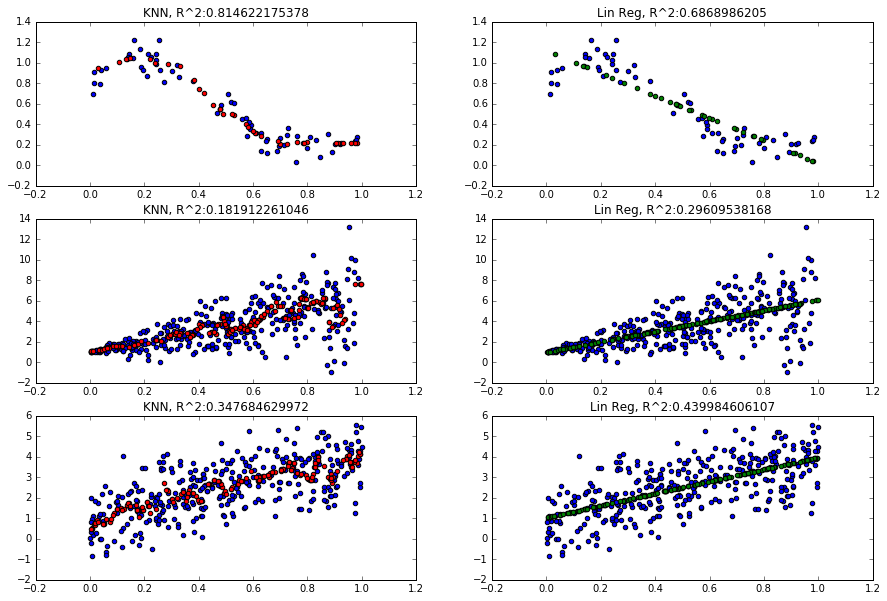

In [9]:
#number of neighbours
k=10

### CODING TIP: You have to generate data for six different datasets, is it a good idea
### to copy and paste the same block of code over and over again for six times? 
### How can you get around this?
### For HW2 it's still ok to copy and paste, for HW3, we will need you to see where functional
### abstraction and iteration are called for and implement them.


#plot predicted points
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))


#Read dataset 1
missing_df = pd.read_csv('./dataset/dataset_1_missing.txt')
full_df = pd.read_csv('./dataset/dataset_1_full.txt')

missing_ind = missing_df[missing_df['y'].isnull()].index
filled_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                missing_ind, 
                                filled_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    missing_ind, 
                                    filled_ind)

ax5, ax6 = plot_missing(ax5, 
                        ax6, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k)


#Read dataset 4
missing_df = pd.read_csv('./dataset/dataset_4_missing.txt')
full_df = pd.read_csv('./dataset/dataset_4_full.txt')

missing_ind = missing_df[missing_df['y'].isnull()].index
filled_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                missing_ind, 
                                filled_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    missing_ind, 
                                    filled_ind)

ax1, ax2 = plot_missing(ax1, 
                        ax2, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k)

#Read dataset 6
missing_df = pd.read_csv('./dataset/dataset_6_missing.txt')
full_df = pd.read_csv('./dataset/dataset_6_full.txt')

missing_ind = missing_df[missing_df['y'].isnull()].index
filled_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, full_df, missing_ind, filled_ind, k)

predicted_lin, r_lin = fill_lin_reg(missing_df, full_df, missing_ind, filled_ind)

ax3, ax4 = plot_missing(ax3, 
                        ax4, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k)
plt.show()

---